# Challenge Large Scale Machine Learning: Starting Kit

### Authors: 
#### Pavlo Mozharovskyi (pavlo.mozharovskyi@telecom-paris.fr), Nathan Noiry (nathan.noiry@telecom-paris.fr)

### Presentation of the challenge : face recognition

#### How does modern face recognition work?
In the past few years, Face Recognition (FR) systems have reached extremely high levels of performance, paving the way to a broader range of applications, where the reliability levels were previously prohibitive to consider automation. This is mainly due to the adoption of deep learning techniques in computer vision. The most adopted paradigm consists in training a network $f: \mathcal{X} \rightarrow \mathbb{R}^d$ which, from a given image $im \in \mathcal{X}$, extracts a feature vector $z \in \mathbb{R}^d$ which synthetizes the relevant caracteristics of $im$. The recognition phase then consists, from two images $im_1, im_2$, to predict wether they correspond to the same identity or not. This is done from the extracted features $z_1, z_2$. 
#### What you are ask to do
In this data challenge, you are ask to train a machine learning model which, from a vector $[z_1, z_2]$ made of the concatenation of two templates $z_1$ and $z_2$, predict wether or not these two images correspond to the same identity.  

### Downloading the Data: 

You can download the Dataset from the below link: 
https://partage.imt.fr/index.php/s/B9sxJEm9fnYJAW3

### Training data

The training set consist of two files, **train_data.npy** and **train_labels.txt**.

File **train_data.npy** contains one observation per row, which is made of the concatenation of two templates, each of dimension 48.

File **train_labels.txt** contains one column with each entry corresponding to one observation in **xtrain_challenge.csv**, maintaining the order, and has '1' if a pair of images belong to the same person and '0' otherwise.

In total, there are 267508 observations.

### Peformance criterion

You are asked to minimize the sum of the False Positive Rate (FPR) and the False Negative Rate (FNR).
Your score is calculated using below equation.

score = 1 - (FPR + FNR)

# Example of submission

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve

np.random.seed(seed=42)

In [2]:
def extract_labels(txt_file):
    with open(txt_file) as file:
        lines = file.readlines()
    y = []
    for elem in lines:
        label = int(elem[0])
        y.append(label)
    y = np.array(y)
    return y

In [3]:
X, y = np.load("data/train_data.npy"), extract_labels("data/train_labels.txt")
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1)

In [4]:
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train, y_train)   

RandomForestClassifier(n_estimators=10)

In [5]:
def criterion(y_pred, y_true):
    CM = confusion_matrix(y_true, y_pred)
    TN, TP = CM[0, 0], CM[1, 1]
    FP, FN = CM[0, 1], CM[1, 0]
    return FP/(FP + TN) + FN/(FN + TP)

In [6]:
y_pred = clf.predict(X_valid)
valid_score = criterion(y_pred, y_valid)
print('FPR + FNR = {}'.format(valid_score))

FPR + FNR = 0.48587000403714176


Confusion Matrix: 
 [[12169  2693]
 [ 4528 10334]]
Accuracy: 0.7570649979814291
False Positive Rate: 0.18120037679989234
False Negative Rate: 0.3046696272372494
FPR + FNR = 0.48587000403714176


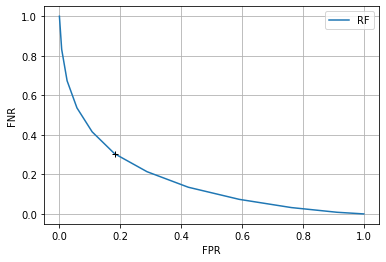

In [7]:
# to further inspect the performance:
CM = confusion_matrix(y_valid, y_pred)
TN, TP = CM[0, 0], CM[1, 1]
FP, FN = CM[0, 1], CM[1, 0]
print('Confusion Matrix: \n {}'.format(CM))
print('Accuracy: {}'.format((TP + TN) / (TP + TN + FP + FN)))  
print('False Positive Rate: {}'.format(FP / (FP + TN)))  
print('False Negative Rate: {}'.format(FN / (FN + TP)))
print('FPR + FNR = {}'.format(FP / (FP + TN) + FN / (FN + TP)))
plt.figure(figsize=(6,4))
plt.grid()
y_prob = clf.predict_proba(X_valid)[:, 1]
fpr, tpr, thresholds = roc_curve(y_valid, y_prob, pos_label=1)
idx = np.argmin(fpr + (1-tpr))
plt.plot(fpr, 1-tpr, label='RF')
plt.plot(fpr[idx], (1-tpr)[idx], '+', color='k')
plt.legend(loc='best')
plt.xlabel('FPR')
plt.ylabel('FNR')
plt.show()

### Prepare a file for submission

In [8]:
# Load test data
X_test = np.load("test_data.npy")
# Classify the provided test data
y_test = clf.predict(X_test).astype(np.int8)
np.savetxt('y_test_challenge_student.txt', y_test, fmt='%i' , delimiter=',')

### Now it's your turn. Good luck !  :) 